In [3]:
df['churn']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: churn, Length: 10000, dtype: int64

In [6]:
#13
for c in df.columns:
    df.dropna(inplace=True)
    dtype = str(df.dtypes[c])
    if dtype in ['int64', 'float64']:
        correlation = df['churn'].corr(df[c])
        if abs(correlation)>=0.15:
            print(c,correlation)

churn 1.0
hnd_price -0.1714427169436197
eqpdays 0.17713086196603486


In [58]:
df.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       ...
       'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17',
       'creditcd', 'eqpdays', 'Customer_ID', 'sum'],
      dtype='object', length=101)

In [16]:
#1
df[df['marital'] != 'M']['ovrmou_Mean'].mean()

44.78009427121102

In [17]:
df['months']

0       61
4       57
9       57
14      59
16      57
        ..
9992    31
9996    33
9997    33
9998    29
9999    31
Name: months, Length: 3143, dtype: int64

In [19]:
#2
df[df['churn'] ==0]['totcalls'].mean()-df[df['churn'] ==1]['totcalls'].mean()

369.5137480821386

In [21]:
#3
df['sum']=df['rev_Mean']+df['mou_Mean']+df['mou_Mean']+df['ovrmou_Mean']

In [22]:
df['sum']

0        462.4975
4       1196.2300
9         82.6625
14      4405.0150
16       949.2675
          ...    
9992     125.9850
9996      17.4900
9997    3745.8850
9998     399.0350
9999     731.8650
Name: sum, Length: 3143, dtype: float64

In [24]:
#4
df[df["da_Mean"]<df["blck_vce_Mean" ]]

0       0.666667
4       0.666667
9       1.000000
18      6.000000
19      0.333333
          ...   
9978    9.333333
9990    8.666667
9997    7.333333
9998    0.333333
9999    1.333333
Name: blck_vce_Mean, Length: 2040, dtype: float64

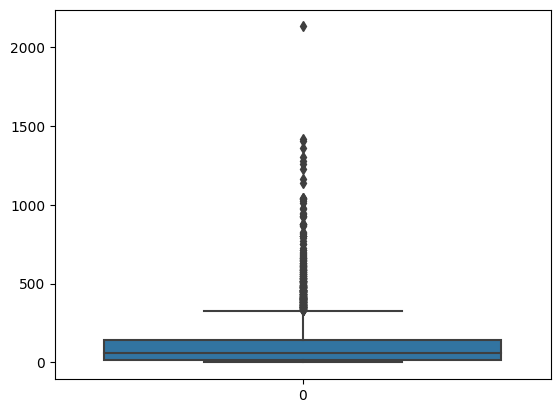

In [26]:
#5
import seaborn as sns
sns.boxplot(df["mou_opkv_Mean" ]);

In [29]:
#6
import pandas as pd
import numpy as np
column_data = df["mou_opkv_Mean" ]
Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
print(len(outliers))

271


In [32]:
#7
df['rev_Mean'].head(1000).mean()-df['rev_Mean'].tail(1000).mean()

14.191927500000006

In [80]:
#8
for c in df.columns:
    df.dropna(inplace=True)
    dtype = str(df.dtypes[c])
    if dtype in ['int64', 'float64']:
        if df[c].skew()>0:
            df.drop(c,axis=1)
          

SyntaxError: incomplete input (1742454929.py, line 7)

In [1]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("w5_Telecom_customer churn.csv")

In [7]:
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0000,0.0000,0.0,0.0000,-157.25,...,0.0,N,U,U,U,U,U,Y,361,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1000,9.1000,0.0,0.0000,532.25,...,0.0,Z,U,U,U,U,U,Y,240,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0000,0.0000,0.0,0.0000,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0000,0.0000,0.0,0.0000,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0000,0.0000,0.0,0.0000,38.50,...,0.0,I,U,U,U,U,U,Y,434,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30.0000,230.75,30.000,0.0000,0.00,0.0000,0.0000,0.0,0.0000,-4.75,...,0.0,O,U,U,U,U,U,N,163,1009996
9996,16.9900,0.25,16.990,0.0000,0.00,0.0000,0.0000,0.0,0.0000,0.75,...,0.0,S,U,U,U,U,U,Y,979,1009997
9997,227.1350,1662.00,189.990,1.4850,194.75,48.6875,48.6875,0.0,3.7225,346.00,...,1.0,N,U,U,U,U,U,Y,477,1009998
9998,76.7850,154.75,34.980,0.0000,12.75,3.8250,3.8250,0.0,0.0000,-146.75,...,0.0,G,U,U,U,U,Y,Y,76,1009999


In [26]:
#9
for c in df.columns:
    if df[c].value_counts(normalize=True).get(0,0)>=0.9:
        print(c)

datovr_Mean
drop_dat_Mean
blck_dat_Mean
unan_dat_Mean
plcd_dat_Mean
recv_sms_Mean
comp_dat_Mean
mou_cdat_Mean
peak_dat_Mean
mou_pead_Mean
opk_dat_Mean
mou_opkd_Mean
callfwdv_Mean
asl_flag
ownrent
infobase
forgntvl
kid0_2
kid3_5


In [28]:
#10
for c in df.columns:
    if df[c].isnull().mean()>=0.9:
        print(c)

In [29]:
#11
for c in df.columns:
    if df[c].dtype != 'int64' and df[c].dtype != 'float64':
        print(c)


new_cell
crclscod
asl_flag
prizm_social_one
area
dualband
refurb_new
hnd_webcap
ownrent
dwlltype
marital
infobase
HHstatin
dwllsize
ethnic
kid0_2
kid3_5
kid6_10
kid11_15
kid16_17
creditcd


In [43]:
#12
for c in df.columns[:20]:#sadece 20 clumu etdim iistesek hamlsln da etmek olar sadace kod gec ise dusecek 
    for d in df.columns[:20]:
        df.dropna(inplace=True)
        dtype = str(df.dtypes[d])
        dtype1 = str(df.dtypes[c])
        if dtype in ['int64', 'float64'] and dtype1 in ['int64', 'float64']:
            if d!=c:
                correlation = df[d].corr(df[c])
                print(c,d,correlation)

rev_Mean mou_Mean 0.7894898030208082
rev_Mean totmrc_Mean 0.7409463591889212
rev_Mean da_Mean 0.46581914438142524
rev_Mean ovrmou_Mean 0.7388402718924587
rev_Mean ovrrev_Mean 0.7561216832735536
rev_Mean vceovr_Mean 0.7546002075112966
rev_Mean datovr_Mean 0.06493801616466119
rev_Mean roam_Mean 0.2467516110790076
rev_Mean change_mou -0.08302311004934305
rev_Mean change_rev -0.06992869824597232
rev_Mean drop_vce_Mean 0.5036848635340596
rev_Mean drop_dat_Mean 0.06281336001331543
rev_Mean blck_vce_Mean 0.3014135800161269
rev_Mean blck_dat_Mean 0.03659150277197829
rev_Mean unan_vce_Mean 0.4464782718950742
rev_Mean unan_dat_Mean 0.06658478569392472
rev_Mean plcd_vce_Mean 0.678542958198666
rev_Mean plcd_dat_Mean 0.09936558973495437
rev_Mean recv_vce_Mean 0.5464195249641469
mou_Mean rev_Mean 0.7894898030208082
mou_Mean totmrc_Mean 0.664907610975486
mou_Mean da_Mean 0.4446267268189025
mou_Mean ovrmou_Mean 0.6432178671394385
mou_Mean ovrrev_Mean 0.5549589654751593
mou_Mean vceovr_Mean 0.553684884

In [44]:
df["income"]

0       4.0
4       6.0
9       9.0
14      3.0
16      3.0
       ... 
9992    7.0
9996    8.0
9997    6.0
9998    7.0
9999    6.0
Name: income, Length: 3143, dtype: float64

In [46]:
df["numbcars"]

0       3.0
4       1.0
9       2.0
14      2.0
16      1.0
       ... 
9992    2.0
9996    1.0
9997    2.0
9998    3.0
9999    1.0
Name: numbcars, Length: 3143, dtype: float64

In [48]:
#14
import matplotlib.pyplot as plt
x=df["income"]
y=df["numbcars"]

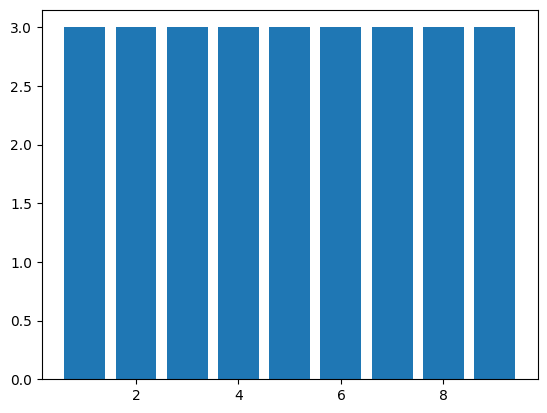

In [50]:
plt.bar(x,y)
plt.show()

In [58]:
#15
for c in df.columns:
    print(c,df[c].mode().iloc[0])

rev_Mean 30.0
mou_Mean 0.0
totmrc_Mean 30.0
da_Mean 0.0
ovrmou_Mean 0.0
ovrrev_Mean 0.0
vceovr_Mean 0.0
datovr_Mean 0.0
roam_Mean 0.0
change_mou 0.0
change_rev 0.0
drop_vce_Mean 0.0
drop_dat_Mean 0.0
blck_vce_Mean 0.0
blck_dat_Mean 0.0
unan_vce_Mean 0.0
unan_dat_Mean 0.0
plcd_vce_Mean 0.0
plcd_dat_Mean 0.0
recv_vce_Mean 0.0
recv_sms_Mean 0.0
comp_vce_Mean 0.0
comp_dat_Mean 0.0
custcare_Mean 0.0
ccrndmou_Mean 0.0
cc_mou_Mean 0.0
inonemin_Mean 0.0
threeway_Mean 0.0
mou_cvce_Mean 0.0
mou_cdat_Mean 0.0
mou_rvce_Mean 0.0
owylis_vce_Mean 0.0
mouowylisv_Mean 0.0
iwylis_vce_Mean 0.0
mouiwylisv_Mean 0.0
peak_vce_Mean 0.0
peak_dat_Mean 0.0
mou_peav_Mean 0.0
mou_pead_Mean 0.0
opk_vce_Mean 0.0
opk_dat_Mean 0.0
mou_opkv_Mean 0.0
mou_opkd_Mean 0.0
drop_blk_Mean 0.0
attempt_Mean 0.0
complete_Mean 0.0
callfwdv_Mean 0.0
callwait_Mean 0.0
churn 0
months 33
uniqsubs 1
actvsubs 1
new_cell U
crclscod A
asl_flag N
totcalls 807
totmou 1989.0
totrev 769.66
adjrev 991.22
adjmou 1353.0
adjqty 3502
avgrev 35.38
